## E-Commerce EDA

In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing data
df = pd.read_csv(r"/kaggle/input/an-online-shop-business/Sales Transaction v.4a.csv")

In [3]:
#casting 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

#Creating 'Total Price Column'
df['Total Price'] = round(df['Price'] * df['Quantity'],2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536350 non-null  object        
 8   Total Price    536350 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 36.8+ MB


In [5]:
#original shape of the dataframe
df.shape

(536350, 9)

In [6]:
#Subsetting dataset based on completed and cancelled transactions
completed = df[df['Quantity'] > 0]
cancelled = df[df['Quantity'] < 0]

In [7]:
completed.shape[0]

527765

There were 527,765 completed transactions in the dataset

In [8]:
cancelled.shape[0]

8585

There were 8,585 cancelled transactions in the dataset.


In [9]:
#Date range of completed transactions
completed['Date'].agg(['min','max'])

min   2018-12-01
max   2019-12-09
Name: Date, dtype: datetime64[ns]

The date range of the datset for all completed transactions December 1, 2018 to December 9, 2019

In [10]:
# Unit price statistical metrics
round(completed['Price'].describe(),2)

count    527765.00
mean         12.63
std           7.93
min           5.13
25%          10.99
50%          11.94
75%          14.09
max         660.62
Name: Price, dtype: float64

In [11]:
# Total Price statistical metrics
round(completed['Total Price'].describe(),2)

count     527765.00
mean         119.31
std         1851.19
min            5.13
25%           17.17
50%           43.83
75%          119.40
max      1002718.10
Name: Total Price, dtype: float64

In [12]:
#Total Revenue of all completed transactions
round(completed['Total Price'].sum(),2)

62965974.34

The total revenue of all completed transactions is 62,965,974.34 USD

In [13]:
# Unique customers with completed tranactions
completed['CustomerNo'].nunique()

4718

There were 4,718 unique customers that had a completed transcation.

In [14]:
#Unique countries
completed['Country'].nunique()

38

The E-Commerce site served 38 indiviudal countries

In [15]:
#Unique product count
completed['ProductName'].nunique()

3753

3,753 unique products were sold on the E-Commerce site in completed transactions.

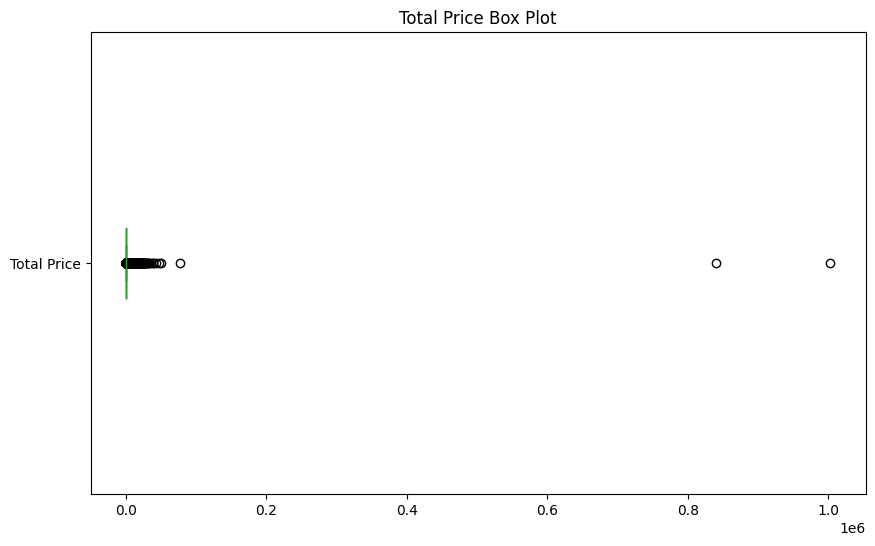

In [47]:
#Boxplot to display distribution
completed['Total Price'].plot(kind = 'box', vert = False, figsize = (10,6), title = 'Total Price Box Plot')
plt.show()

Majority of the total price values are outliers, as they fall outside of the interquartile range between 17.17 USD and 119.40 USD. Additionally,the mean total price is less than the median total price indicative of a slgiht negative skew in the total price data. 